<a href="https://colab.research.google.com/github/VaishaliBalamurugan22008813/mnist-classification/blob/main/deeplearning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

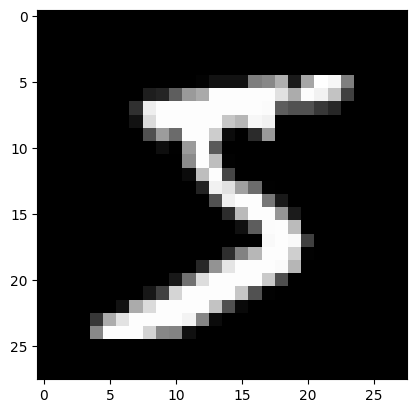

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()


255

In [ ]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0



In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)



In [ ]:

type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

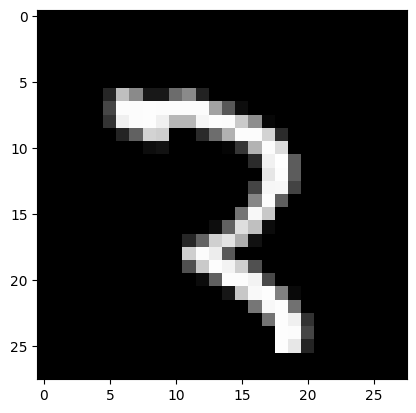

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:

y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # Changed metrics argument to a list

In [ ]:


model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8545 - loss: 0.5266 - val_accuracy: 0.9511 - val_loss: 0.1664
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9593 - loss: 0.1438 - val_accuracy: 0.9672 - val_loss: 0.1138
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9729 - loss: 0.0936 - val_accuracy: 0.9691 - val_loss: 0.1015
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9792 - loss: 0.0724 - val_accuracy: 0.9746 - val_loss: 0.0819
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0533 - val_accuracy: 0.9728 - val_loss: 0.0890


In [ ]:
# Ensure you run the model.fit() method first to train the model and populate the history attribute
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

# Now you can access the training history and create the DataFrame
metrics = pd.DataFrame(model.history.history)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.8457 - loss: 0.5075 - val_accuracy: 0.9722 - val_loss: 0.0956
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9756 - loss: 0.0819 - val_accuracy: 0.9793 - val_loss: 0.0615
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9835 - loss: 0.0537 - val_accuracy: 0.9820 - val_loss: 0.0545
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9877 - loss: 0.0408 - val_accuracy: 0.9837 - val_loss: 0.0490
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9893 - loss: 0.0338 - val_accuracy: 0.9839 - val_loss: 0.0469


In [ ]:
metrics.head()


,accuracy,loss,val_accuracy,val_loss
0,0.924500,0.252598,0.9722,0.095621
1,0.977483,0.075955,0.9793,0.061457
2,0.982867,0.055931,0.9820,0.054498
3,0.987183,0.042737,0.9837,0.049008
4,0.989150,0.034452,0.9839,0.046934


VAISHALI BALAMURUGAN:212222230164


<Axes: >

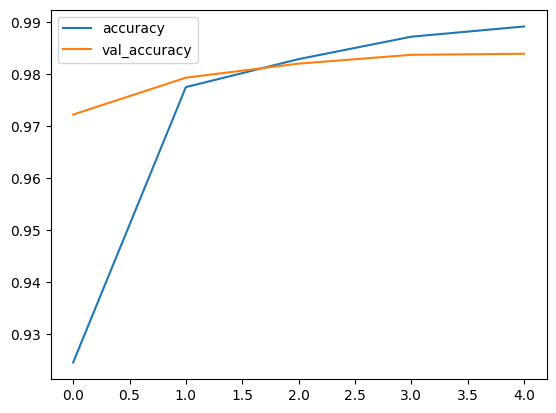

In [ ]:
print("VAISHALI BALAMURUGAN:212222230164")
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

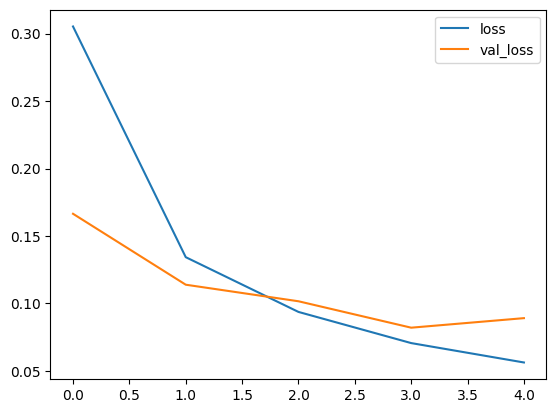

In [ ]:
metrics[['loss','val_loss']].plot()


In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 966    0    1    1    2    0    3    2    3    2]
 [   0 1117    3    2    0    1    2    4    5    1]
 [   4    1  999    6    2    0    2   10    7    1]
 [   0    0    2  992    0    0    0    7    2    7]
 [   1    0    3    0  963    0    5    2    1    7]
 [   2    0    0   27    3  842    5    2    6    5]
 [   3    3    1    2    4    5  936    1    3    0]
 [   0    1    8    3    2    0    0 1010    1    3]
 [   3    0    3   13    6    2    2    7  929    9]
 [   3    2    0    7   11    0    0    9    3  974]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.94      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
img = image.load_img('de.png')


In [ ]:
img = image.load_img('de.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
print(x_single_prediction)

[7]


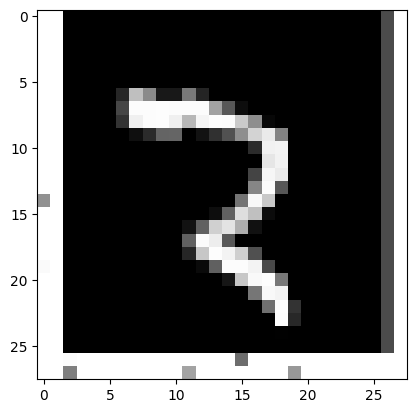

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[3]
